# Actividad Evaluable: Mapas de calor y boxplots  
1. Carga los datos.

In [116]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

datos = pd.read_csv("covid19_tweets.csv")

Modificamos las columnas 'user_created' y 'date' para poder utilizarlas en nuestras representaciones gráficas. 

In [117]:
datos['user_created'] = pd.to_datetime(datos['user_created'])
datos['user_created'] = datos['user_created'].dt.date

datos['date'] = pd.to_datetime(datos['date'])
datos['date'] = datos['date'].dt.date

Creamos dos columnas extras para tener a las fechas como enteros y poder utilizarlas aún más.

In [118]:
def fecha_a_numero(fecha):
    return int(fecha.strftime('%Y%m%d'))

datos['user_created_entero'] = datos['user_created'].apply(fecha_a_numero)
datos['date_entero'] =  datos['date'].apply(fecha_a_numero)


Visualizamos cómo se ven nuestras tablas modificadas:

In [119]:
print(datos.head())

         user_name         user_location  \
0           ᏉᎥ☻լꂅϮ            astroworld   
1    Tom Basile 🇺🇸          New York, NY   
2  Time4fisticuffs      Pewee Valley, KY   
3      ethel mertz  Stuck in the Middle    
4         DIPR-J&K     Jammu and Kashmir   

                                    user_description user_created  \
0  wednesday addams as a disney princess keepin i...   2017-05-26   
1  Husband, Father, Columnist & Commentator. Auth...   2009-04-16   
2  #Christian #Catholic #Conservative #Reagan #Re...   2009-02-28   
3  #Browns #Indians #ClevelandProud #[]_[] #Cavs ...   2019-03-07   
4  🖊️Official Twitter handle of Department of Inf...   2017-02-12   

   user_followers  user_friends  user_favourites  user_verified        date  \
0             624           950            18775          False  2020-07-25   
1            2253          1677               24           True  2020-07-25   
2            9275          9525             7254          False  2020-07-25   
3   

Realizamos boxplots.

<Axes: >

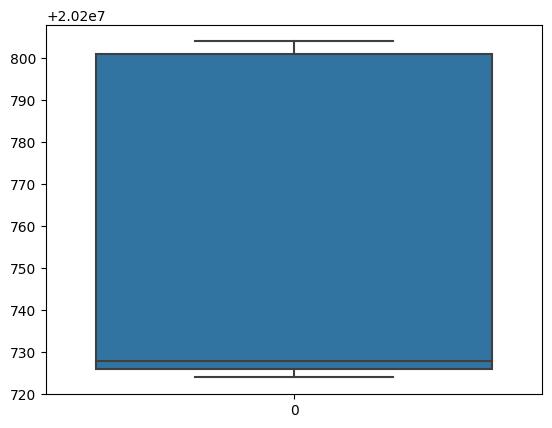

In [120]:
sns.boxplot(data=datos["date_entero"], showfliers=False)

Hacemos un histograma. Elegimos hacerlo de la columna 'date' porque nos interesaba descubrir si los tweets se subieron más en alguna fecha que en otra. Descubrimos que se subieron más o menos la misma cantidad de tweets por fecha, excepto por dos fechas en las que se subieron alrededor de 2000 tweets más que en las demás.

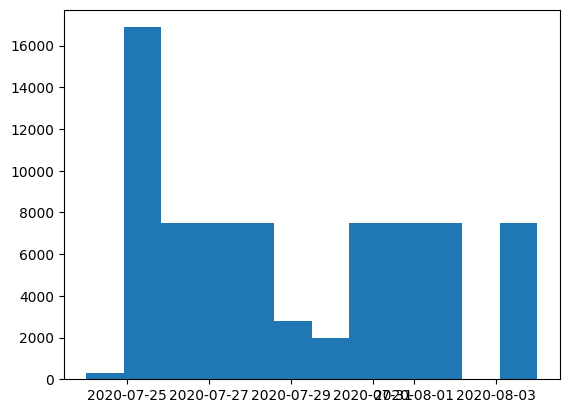

In [121]:
fig, ax = plt.subplots()
ax.hist(datos['date'], bins=12)
plt.show()

In [122]:
datos[['user_followers', 'user_friends', 'user_favourites']].corr()

,user_followers,user_friends,user_favourites
user_followers,1.000000,-0.002722,-0.028724
user_friends,-0.002722,1.000000,0.207825
user_favourites,-0.028724,0.207825,1.000000
